## Finance/Accounting Course Rating Prediction

Given *data about finance and accounting courses on Udemy*, let's try to predict the **rating** of a given course.

We will use Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/jilkothari/finance-accounting-courses-udemy-13k-course

### Getting Started

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('archive/udemy_output_All_Finance__Accounting_p1_p626.csv')
data

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.00000,0.00000,0.00000,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.00000,0.00000,0.00000,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.00000,0.00000,0.00000,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.00000,0.00000,0.00000,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

### Cleaning

In [4]:
df = data.copy()

In [5]:
df = df.drop(['id', 'title', 'url'], axis=1)

In [6]:
df

,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,False,47,0.00000,0.00000,0.00000,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN
13604,False,19,0.00000,0.00000,0.00000,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN
13605,False,47,0.00000,0.00000,0.00000,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN
13606,False,48,0.00000,0.00000,0.00000,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().mean()

is_paid                         0.000000
num_subscribers                 0.000000
avg_rating                      0.000000
avg_rating_recent               0.000000
rating                          0.000000
num_reviews                     0.000000
is_wishlisted                   0.000000
num_published_lectures          0.000000
num_published_practice_tests    0.000000
created                         0.000000
published_time                  0.000000
discount_price__amount          0.103101
discount_price__currency        0.103101
discount_price__price_string    0.103101
price_detail__amount            0.036523
price_detail__currency          0.036523
price_detail__price_string      0.036523
dtype: float64

In [8]:
df['discount_price__currency'].unique(), df['price_detail__currency'].unique()

(array(['INR', nan], dtype=object), array(['INR', nan], dtype=object))

In [9]:
df.drop(['discount_price__currency', 'price_detail__currency'], axis=1, inplace=True)

In [10]:
df.isna().mean()

is_paid                         0.000000
num_subscribers                 0.000000
avg_rating                      0.000000
avg_rating_recent               0.000000
rating                          0.000000
num_reviews                     0.000000
is_wishlisted                   0.000000
num_published_lectures          0.000000
num_published_practice_tests    0.000000
created                         0.000000
published_time                  0.000000
discount_price__amount          0.103101
discount_price__price_string    0.103101
price_detail__amount            0.036523
price_detail__price_string      0.036523
dtype: float64

In [11]:
df[df["discount_price__amount"].isna()]

,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__price_string,price_detail__amount,price_detail__price_string
33,True,27681,4.47545,4.48064,4.48064,10671,False,14,0,2013-12-29T13:38:01Z,2013-12-31T16:51:18Z,NaN,NaN,2240.0,"₹2,240"
39,True,20978,4.45476,4.45477,4.45477,9594,False,21,1,2019-02-28T23:37:10Z,2019-03-18T14:09:54Z,NaN,NaN,3200.0,"₹3,200"
40,True,34296,4.43750,4.45212,4.45212,9520,False,19,0,2013-12-29T15:38:47Z,2013-12-31T16:52:41Z,NaN,NaN,2240.0,"₹2,240"
80,True,28932,4.42527,4.41998,4.41998,4881,False,47,0,2013-02-24T14:47:08Z,2013-02-25T11:36:06Z,NaN,NaN,9600.0,"₹9,600"
90,True,27653,4.40769,4.41472,4.41472,4579,False,345,0,2014-10-27T16:27:34Z,2014-11-05T21:07:38Z,NaN,NaN,12800.0,"₹12,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,False,47,0.00000,0.00000,0.00000,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN
13604,False,19,0.00000,0.00000,0.00000,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN
13605,False,47,0.00000,0.00000,0.00000,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN
13606,False,48,0.00000,0.00000,0.00000,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN


In [12]:
df.dtypes

is_paid                            bool
num_subscribers                   int64
avg_rating                      float64
avg_rating_recent               float64
rating                          float64
num_reviews                       int64
is_wishlisted                      bool
num_published_lectures            int64
num_published_practice_tests      int64
created                          object
published_time                   object
discount_price__amount          float64
discount_price__price_string     object
price_detail__amount            float64
price_detail__price_string       object
dtype: object

In [13]:
df = df.drop(['discount_price__price_string', 'price_detail__price_string'], axis=1)

In [14]:
df

,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0
1,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0
2,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,8640.0
3,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,8640.0
4,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,False,47,0.00000,0.00000,0.00000,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN
13604,False,19,0.00000,0.00000,0.00000,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN
13605,False,47,0.00000,0.00000,0.00000,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN
13606,False,48,0.00000,0.00000,0.00000,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN


In [15]:
df.isna().mean()

is_paid                         0.000000
num_subscribers                 0.000000
avg_rating                      0.000000
avg_rating_recent               0.000000
rating                          0.000000
num_reviews                     0.000000
is_wishlisted                   0.000000
num_published_lectures          0.000000
num_published_practice_tests    0.000000
created                         0.000000
published_time                  0.000000
discount_price__amount          0.103101
price_detail__amount            0.036523
dtype: float64

In [16]:
for column in ['discount_price__amount', 'price_detail__amount']:
    df[column] = df[column].fillna(df[column].mean())

In [17]:
print("Total missing values: ", df.isna().sum().sum())

Total missing values:  0


### FeatureEngineering/Encoding/Splitting/Scaling

In [18]:
df['created_year'] = df['created'].apply(lambda x: int(x[0:4]))
df['created_month'] = df['created'].apply(lambda x: int(x[5:7]))

df['published_year'] = df['published_time'].apply(lambda x: int(x[0:4]))
df['published_month'] = df['published_time'].apply(lambda x: int(x[5:7]))

df.drop(['created', 'published_time'], axis=1, inplace=True)

In [19]:
df

,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,created_month,published_year,published_month
0,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,455.000000,8640.000000,2016,2,2016,4
1,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,455.000000,8640.000000,2016,8,2016,8
2,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,455.000000,8640.000000,2017,9,2017,11
3,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,455.000000,8640.000000,2015,10,2016,1
4,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,455.000000,8640.000000,2015,10,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,False,47,0.00000,0.00000,0.00000,0,False,6,0,493.943794,4646.992602,2020,4,2020,4
13604,False,19,0.00000,0.00000,0.00000,0,False,5,0,493.943794,4646.992602,2020,9,2020,9
13605,False,47,0.00000,0.00000,0.00000,0,False,5,0,493.943794,4646.992602,2020,7,2020,7
13606,False,48,0.00000,0.00000,0.00000,0,False,13,0,493.943794,4646.992602,2020,6,2020,7


In [20]:
df['is_paid'] = df['is_paid'].astype(int)
df['is_wishlisted'] = df['is_wishlisted'].astype(int)

In [21]:
df

,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,created_month,published_year,published_month
0,1,295509,4.66019,4.67874,4.67874,78006,0,84,0,455.000000,8640.000000,2016,2,2016,4
1,1,209070,4.58956,4.60015,4.60015,54581,0,78,0,455.000000,8640.000000,2016,8,2016,8
2,1,155282,4.59491,4.59326,4.59326,52653,0,292,2,455.000000,8640.000000,2017,9,2017,11
3,1,245860,4.54407,4.53772,4.53772,46447,0,338,0,455.000000,8640.000000,2015,10,2016,1
4,1,374836,4.47080,4.47173,4.47173,41630,0,83,0,455.000000,8640.000000,2015,10,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,0,47,0.00000,0.00000,0.00000,0,0,6,0,493.943794,4646.992602,2020,4,2020,4
13604,0,19,0.00000,0.00000,0.00000,0,0,5,0,493.943794,4646.992602,2020,9,2020,9
13605,0,47,0.00000,0.00000,0.00000,0,0,5,0,493.943794,4646.992602,2020,7,2020,7
13606,0,48,0.00000,0.00000,0.00000,0,0,13,0,493.943794,4646.992602,2020,6,2020,7


In [22]:
y = df['rating'].copy()
X = df.drop('rating', axis=1).copy()

In [23]:
(df['avg_rating_recent'] == df['rating']).all()

np.True_

In [24]:
X.drop(['avg_rating_recent', 'avg_rating'] , axis=1, inplace=True)

In [25]:
X

,is_paid,num_subscribers,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,created_month,published_year,published_month
0,1,295509,78006,0,84,0,455.000000,8640.000000,2016,2,2016,4
1,1,209070,54581,0,78,0,455.000000,8640.000000,2016,8,2016,8
2,1,155282,52653,0,292,2,455.000000,8640.000000,2017,9,2017,11
3,1,245860,46447,0,338,0,455.000000,8640.000000,2015,10,2016,1
4,1,374836,41630,0,83,0,455.000000,8640.000000,2015,10,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13603,0,47,0,0,6,0,493.943794,4646.992602,2020,4,2020,4
13604,0,19,0,0,5,0,493.943794,4646.992602,2020,9,2020,9
13605,0,47,0,0,5,0,493.943794,4646.992602,2020,7,2020,7
13606,0,48,0,0,13,0,493.943794,4646.992602,2020,6,2020,7


In [26]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [27]:
X

,is_paid,num_subscribers,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,created_month,published_year,published_month
0,0.194494,31.010480,49.188719,0.0,1.210681,-0.177269,-0.153543,1.308462,-0.714399,-1.262103,-0.794065,-0.692074
1,0.194494,21.851399,34.371283,0.0,1.070381,-0.177269,-0.153543,1.308462,-0.714399,0.511440,-0.794065,0.503602
2,0.194494,16.152020,33.151731,0.0,6.074433,3.030541,-0.153543,1.308462,-0.217489,0.807031,-0.289365,1.400359
3,0.194494,25.749669,29.226138,0.0,7.150071,-0.177269,-0.153543,1.308462,-1.211308,1.102621,-0.794065,-1.588831
4,0.194494,39.415973,26.179155,0.0,1.187298,-0.177269,-0.153543,1.308462,-1.211308,1.102621,-0.794065,-1.588831
...,...,...,...,...,...,...,...,...,...,...,...,...
13603,-5.141545,-0.296689,-0.153817,0.0,-0.613225,-0.177269,0.000000,0.000000,1.273240,-0.670922,1.224737,-0.692074
13604,-5.141545,-0.299656,-0.153817,0.0,-0.636609,-0.177269,0.000000,0.000000,1.273240,0.807031,1.224737,0.802521
13605,-5.141545,-0.296689,-0.153817,0.0,-0.636609,-0.177269,0.000000,0.000000,1.273240,0.215850,1.224737,0.204683
13606,-5.141545,-0.296583,-0.153817,0.0,-0.449541,-0.177269,0.000000,0.000000,1.273240,-0.079741,1.224737,0.204683


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=32)

### Modeling/Training

In [29]:
X.shape

(13608, 12)

In [31]:
inputs = tf.keras.Input(shape=(12, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs, outputs)

batch_size = 32
epochs = 100

model.compile(
    optimizer = 'adam',
    loss = 'mse'
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.12,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.4856 - val_loss: 1.3487 - learning_rate: 0.0010
Epoch 2/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2047 - val_loss: 1.1124 - learning_rate: 0.0010
Epoch 3/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0833 - val_loss: 1.0522 - learning_rate: 0.0010
Epoch 4/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0387 - val_loss: 1.0033 - learning_rate: 0.0010
Epoch 5/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0099 - val_loss: 0.9914 - learning_rate: 0.0010
Epoch 6/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9949 - val_loss: 1.0249 - learning_rate: 0.0010
Epoch 7/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9936 - val_loss: 0.9832 - learning_rate: 0.0010
Epoch 8/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9788 - val_loss: 1.0127 - learning_rate: 0.0010
Epoch 9/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9755 - val_loss: 0.9815 - learning_rate: 0.0010
E

### Results

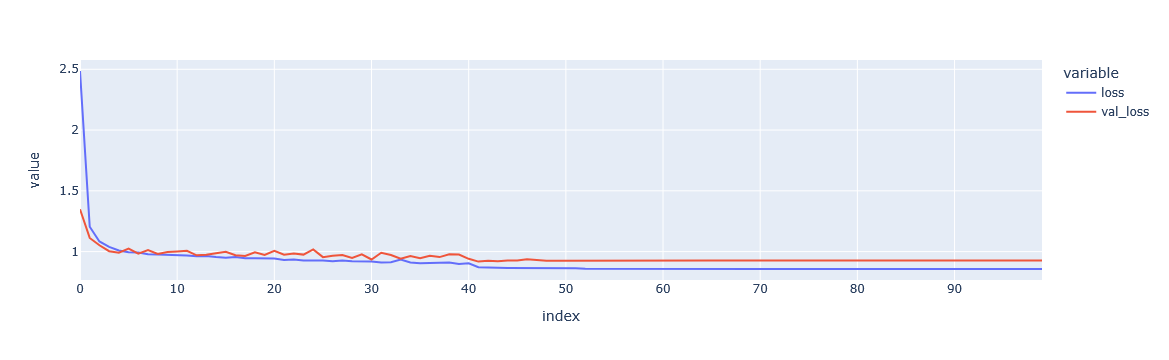

In [32]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'x': 'Epoch', 'y': 'loss'}
)

fig.show()

In [33]:
model.evaluate(X_test, y_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9667


0.9667423367500305

In [34]:
y_pred = np.squeeze(model.predict(X_test))
y_pred

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([3.650486 , 3.894354 , 3.8991516, ..., 4.01823  , 3.9488466,
       4.2988715], dtype=float32)

In [35]:
y_test

5645    4.09372
6681    4.23117
3033    3.80626
4001    4.69073
383     4.49064
         ...   
2012    4.55466
4431    2.89167
6734    3.44862
7310    4.20760
496     4.33232
Name: rating, Length: 4083, dtype: float64

In [36]:
rsquared = r2_score(y_test, y_pred)

In [37]:
print("R^2 Score: ", rsquared)

R^2 Score:  0.1206296573612814
